# Understanding Lego sets popularity - A Data Analysis Project

##### Pablo Cumbrera Conde

![Legos4](Legos4.jpg)

### Index
1. Background
2. Data Source
- 2.1 Visualizing Data Relationships
- 2.2 Explaining Data Relationships
3. The Challenge
- Goals
- Analysis
4. Summarizing Findings

___

## 1.  Background📖
You recently applied to work as a data analyst intern at the famous Lego Group in Denmark. As part of the job interview process, you received the following take-home assignment:

You are asked to use the provided dataset to understand the popularity of different Lego sets and themes. The idea is to become familiarized with the data to be ready for an interview with a business stakeholder.

## 2. Data Source💾


#### 2.1 Visualizing Data Relationships
You received access to a database with the following tables. You can also visualization of how the tables are related to each other. ([source](https://rebrickable.com/downloads)):


![erd](data/lego_erd.png)

#### 2.2 Explaining Data Relationships

#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


***Acknowledgments**: Rebrickable.com*

##  3. Challenge💪

#### 3.1 Goals
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Create a visualization for item 2.
4. What are the 5 most popular colors used in Lego parts?
5. [Optional] What proportion of Lego parts are transparent?
6. [Optional] What are the 5 rarest lego bricks?
7. Summarize your findings.

#### 3.2 Analysis

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from skimage.transform import resize
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Seaborn Style
sns.set_style("whitegrid")

#### 3.2 - 1. Average of LEGO sets released per year

In [2]:
-- By year
-- Temporary table counting number of sets / year

WITH temp_sets_year AS (
    SELECT COUNT(sets.set_num) AS sets
    , sets.year AS year
    FROM sets
    GROUP BY year
    )

-- Calculate average per year

SELECT AVG(sets) AS avg_sets_year
    , year
FROM temp_sets_year
GROUP BY year
ORDER BY year ASC

,avg_sets_year,year
0,7.0,1950
1,4.0,1953
2,14.0,1954
3,28.0,1955
4,12.0,1956
...,...,...
61,593.0,2013
62,713.0,2014
63,665.0,2015
64,596.0,2016


In [3]:
-- Total
-- Temporary table counting number of sets / year

WITH temp_sets_year AS (
    SELECT COUNT(sets.set_num) AS sets
    , sets.year AS year
    FROM sets
    GROUP BY year
    )

-- Calculate average per year

SELECT ROUND(AVG(sets), 1) AS avg_sets_year
FROM temp_sets_year

,avg_sets_year
0,176.9


#### 3.2 - 2. Average of LEGO parts released per year

In [4]:
-- Temporary table counting number of sets / parts / year

WITH temp_parts_year AS (
    SELECT COUNT(sets.set_num) AS sets
    , SUM (sets.num_parts) AS parts
    , sets.year AS year
    FROM sets
    GROUP BY year
    )

-- Calculate average

SELECT AVG (parts) AS parts, year
FROM temp_parts_year
GROUP BY year
ORDER BY year ASC

,parts,year
0,71.0,1950
1,66.0,1953
2,173.0,1954
3,1032.0,1955
4,222.0,1956
...,...,...
61,107537.0,2013
62,121007.0,2014
63,134110.0,2015
64,150834.0,2016


#### 3.2 - 3. Visualizing Parts/year

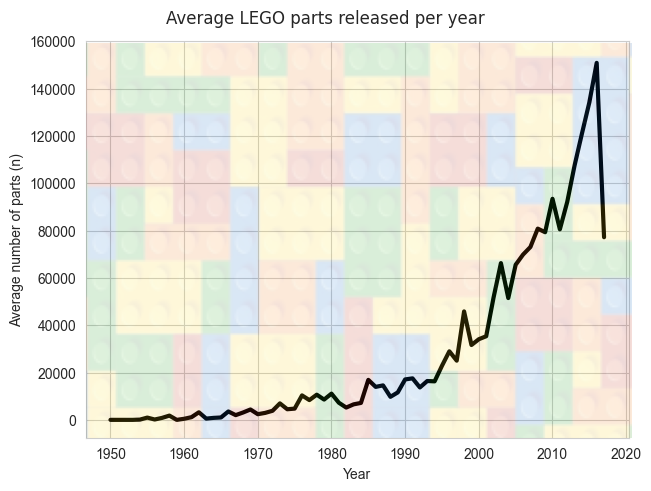

In [5]:
# Adapting DF to plot
parts_df_copy = parts_df.set_index(parts_df['year']).drop('year', axis = 1)


# Create Fig
fig, ax = plt. subplots(constrained_layout = True)


# Corpus
plt.plot(parts_df_copy, linewidth = 3, color = 'black')

# Add-ons
plt.suptitle ("Average LEGO parts released per year", font = 'comicsans')
plt.xlabel ("Year")
plt.yticks (np.arange(0, 170000, 20000))
plt.ylabel ("Average number of parts (n)")

# Background Image

image =  mpimg.imread('colorful.jpg')
res = resize(image, (200,275.5))
axes_coords = [0.125, 0, 0.852, 1.02]
ax_image = plt.gcf().add_axes(axes_coords)
ax_image.imshow(res, alpha=.15)
ax_image.axis('off')


# Show!
plt.show()

#### 3.2 - 4. Top 5 most popular colors

In [6]:
-- SUM every part associated to a color code (Limited to 5), eliminating transparecy items.
-- From relationship n*m

SELECT SUM (inventory_parts.quantity) AS quantity
, colors.rgb AS color_code
, colors.name AS color_name
FROM colors

INNER JOIN inventory_parts
ON inventory_parts.color_id = colors.id

WHERE colors.is_trans = False
GROUP BY color_code, color_name
ORDER BY quantity DESC
LIMIT 5

,quantity,color_code,color_name
0,396416,05131D,Black
1,221553,FFFFFF,White
2,201858,A0A5A9,Light Bluish Gray
3,169983,C91A09,Red
4,148584,6C6E68,Dark Bluish Gray


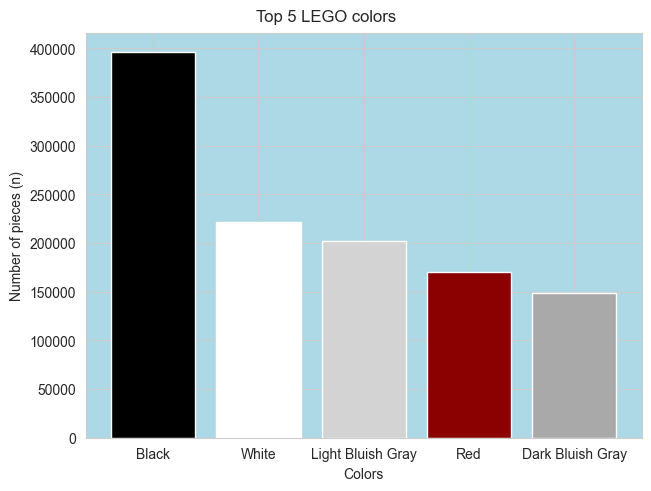

In [7]:
# Create Fig
fig, ax = plt. subplots(constrained_layout = True)

# Corpus
plt.bar(top_colors['color_name'], top_colors['quantity'], color=['black','white','lightgrey','darkred','darkgrey'])
plt.axisbg = '# FFDAB9'

# Add-ons
plt.suptitle("Top 5 LEGO colors")
plt.xlabel( "Colors")
plt.ylabel( "Number of pieces (n)")

# Background Image
ax.set_facecolor('lightblue')

# show
plt.show()

#### 3.2 - 5. What proportion of LEGO are transparent?

In [8]:
-- Counting transparent / colorful elements 

WITH color_trans AS (
    SELECT SUM (inventory_parts.quantity) AS quantity
    , colors.is_trans AS transparecy
    
    FROM colors
    
    INNER JOIN inventory_parts
    ON inventory_parts.color_id = colors.id
    
    GROUP BY colors.is_trans

    )

-- Extract proportions

SELECT quantity / (SELECT SUM(quantity) FROM color_trans) * 100 AS proportions
        , transparecy
FROM color_trans
GROUP BY quantity, transparecy

,proportions,transparecy
0,4.937809,True
1,95.062191,False


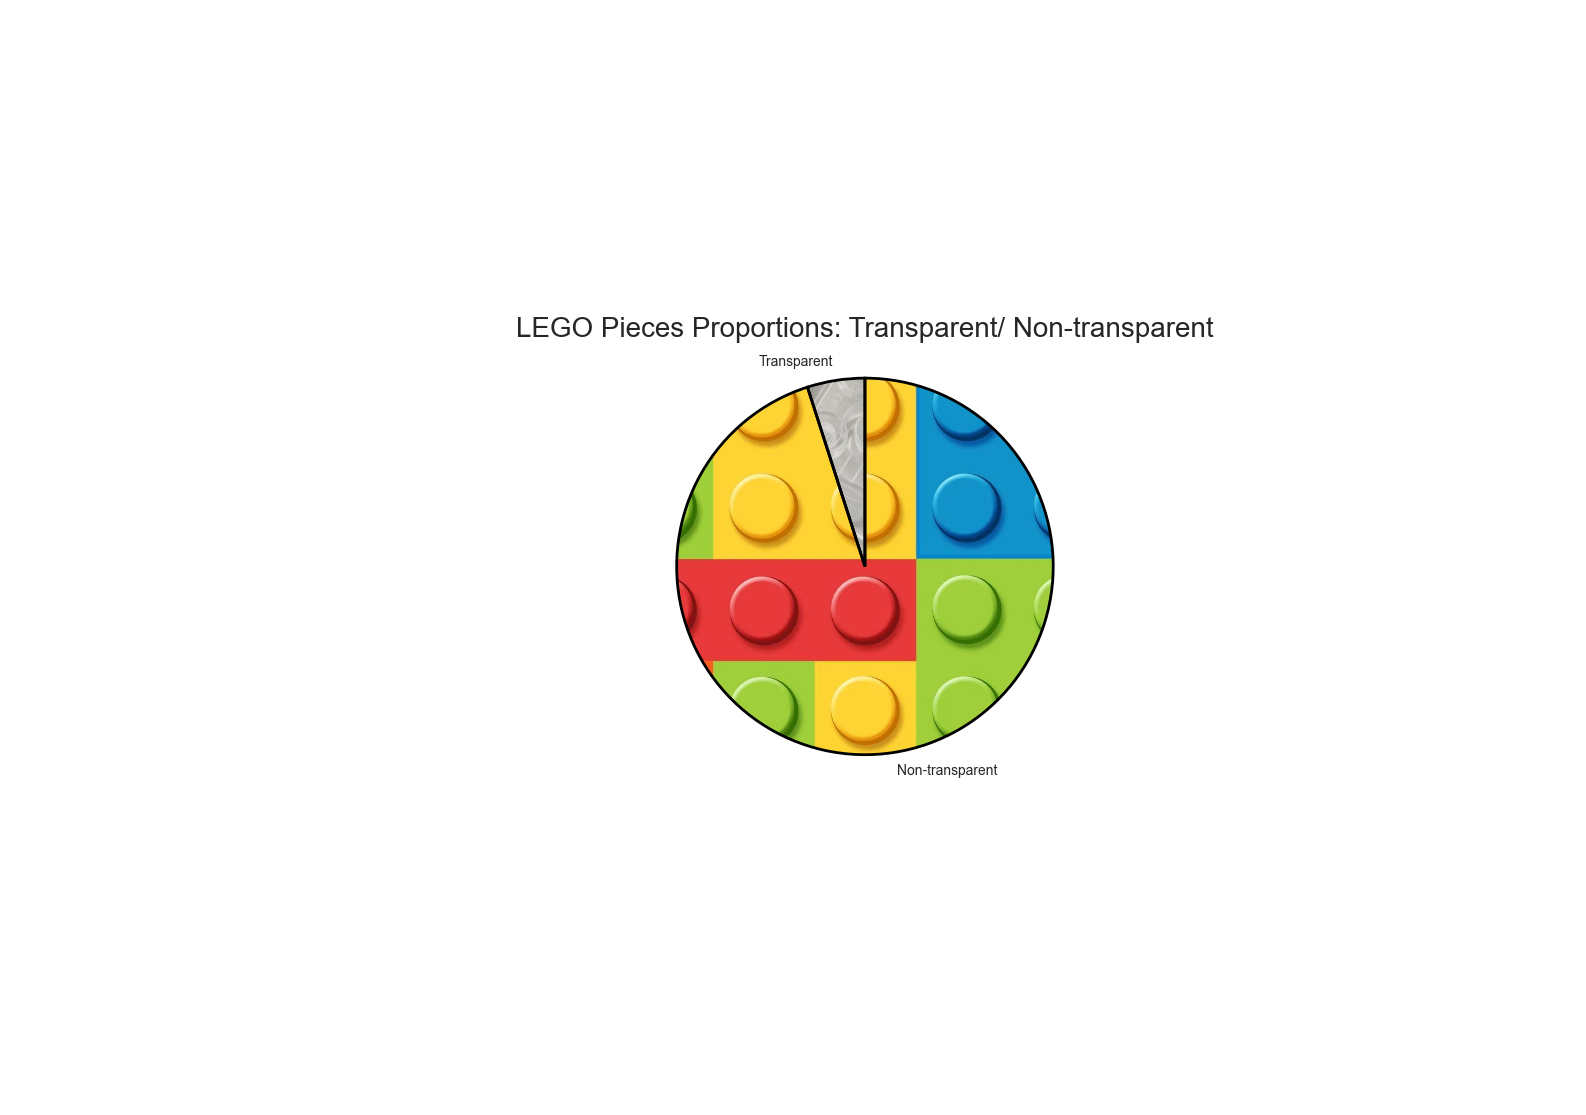

In [12]:
# Create Fig
fig, ax = plt. subplots(constrained_layout = True)

# Arguments for IMG plotting
total = proportions_df['proportions']
labels = ["Transparent", "Non-transparent"]
plt.title("LEGO Pieces Proportions: Transparent/ Non-transparent", fontsize = 20)
plt.gca().axis("equal")
wedges, texts = plt.pie(total, startangle=90, labels=labels,
                        wedgeprops = { 'linewidth': 2, "edgecolor" :"k","fill":False,  })


# Images to Pie
def img_to_pie( fn, wedge, xy, zoom=1, ax = None):
    if ax==None: ax=plt.gca()
    im = plt.imread(fn, format='jpg')
    path = wedge.get_path()
    patch = PathPatch(path, facecolor='none')
    ax.add_patch(patch)
    imagebox = OffsetImage(im, zoom=zoom, clip_path=patch, zorder=-10)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0, frameon=False)
    ax.add_artist(ab)

positions = [(-1,0.3),(0,-0.5)]
zooms = [0.4,0.4,0.4]

# Iterate over items
for i in range(2):
    fn = "{}.jpg".format(labels[i].lower())
    img_to_pie(fn, wedges[i], xy=positions[i], zoom=zooms[i] )
    wedges[i].set_zorder(10)

# Show !
plt.show()

#### 3.2 - 6. Top 5 rarest bricks

In [10]:
-- JOIN along all table FROM "parts" to "themes" so we could get themed information about the parts. 
-- JOIN between tables are according to the relationship between them.
-- 1st relationship (temporary) -> themes JOIN sets JOIN inventories JOIN inventory_parts
-- 2nd relationship () -> part_categories JOIN parts JOIN inventory_parts
-- Both are related on inventory_parts at the end of the JOINNING path
    
-- 1 relation
WITH temp_themes AS (
    SELECT themes.name
    , inventory_parts.part_num
    , inventory_parts.color_id
    , inventory_parts.quantity AS quantity
    , colors.name AS color
    
    FROM themes
    
    LEFT JOIN sets
    ON sets.theme_id = themes.id
    
    INNER JOIN inventories
    ON sets.set_num = inventories.set_num
    
    INNER JOIN inventory_parts
    ON inventories.id = inventory_parts.inventory_id
    
    RIGHT JOIN colors
    ON inventory_parts.color_id = colors.id

    )


-- 2 relation

SELECT parts.name AS part_name
, SUM (temp_themes.quantity) AS total_quantity
, temp_themes.name AS theme
, temp_themes.color AS color

FROM part_categories

INNER JOIN parts
ON part_categories.id = parts.part_cat_id

LEFT JOIN temp_themes
ON parts.part_num = temp_themes.part_num


WHERE part_categories.name = 'Bricks'
GROUP BY part_name, temp_themes.name, temp_themes.color
ORDER BY total_quantity ASC
LIMIT 5

,part_name,total_quantity,theme,color
0,Brick 2 x 3 without Cross Supports,1,Harbor,Black
1,Brick 2 x 3,1,Soccer,Red
2,Brick 2 x 8,1,Batman,Tan
3,Brick 1 x 3,1,Gas Station,Light Gray
4,Brick 1 x 10,1,Unitron,Blue


## 4. Summarizing Findings

The vastness of the data analyzed is proportional to the popularity of LEGO.

#### Summarize findings
1. Has releassed:
- 1950: 7 sets, 71 parts
- 2016: 569 sets and 150.000 parts
- Total yearly average 176,9
2. Most popular pieces color are
- Black
- White
- Light Grey
- Red
- Dark Grey
4. About transparecy:
- 95 % of the pieces are not translucent/transparent
- 5 % of the pieces are
5. Rarest themed/colored Bricks have different characteristics and peculiarities, coming from different sets and colors.